In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [17]:
# we already l2 normalized tfidif on main
TFIDF = pd.read_csv("data/TFIDF.csv")
TFIDF = TFIDF.set_index('company_id')
TFIDF

,technology,world,please,today,sales,components,use,materials,email,delivery,...,rod,any,signage,holes,itar,apply,weather,behalf,draft,yield
company_id,,,,,,,,,,,,,,,,,,,,,
3,0.099879,0.061886,-0.012543,0.025122,-0.020175,0.088139,-0.013366,-0.013573,-0.015839,0.029169,...,-0.001708,-0.001605,0.116552,-0.001762,-0.001866,-0.001529,0.116557,-0.001378,-0.002480,-0.001512
10,0.009435,0.009051,-0.012543,0.055200,-0.020175,0.066074,0.050226,0.007625,-0.015839,0.013091,...,-0.001708,-0.001605,-0.004108,-0.001762,-0.001866,-0.001529,-0.004104,-0.001378,-0.002480,-0.001512
33,0.013407,-0.013332,-0.012543,-0.013174,-0.020175,0.056164,0.011594,-0.013573,-0.015839,-0.010543,...,-0.001708,-0.001605,-0.004108,-0.001762,-0.001866,-0.001529,-0.004104,-0.001378,-0.002480,-0.001512
34,0.074543,-0.013332,-0.012543,0.025007,-0.007215,0.075981,-0.001529,0.010102,-0.015839,-0.010543,...,-0.001708,-0.001605,-0.004108,-0.001762,-0.001866,-0.001529,-0.004104,-0.001378,0.037619,-0.001512
49,-0.012948,-0.013332,-0.012543,-0.013174,-0.020175,-0.018715,-0.013366,-0.013573,-0.015839,-0.010543,...,-0.001708,-0.001605,0.031751,-0.001762,-0.001866,-0.001529,-0.004104,-0.001378,-0.002480,-0.001512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-0.012948,-0.013332,0.003094,-0.013174,-0.014770,-0.018715,0.001443,-0.013573,-0.010903,0.000465,...,-0.001708,-0.001605,-0.004108,0.014961,-0.001866,-0.001529,-0.004104,-0.001378,-0.002480,-0.001512
1200,-0.012948,-0.013332,0.017242,0.047484,-0.020175,-0.018715,-0.013366,-0.004170,-0.015839,-0.010543,...,-0.001708,0.030247,-0.004108,-0.001762,-0.001866,-0.001529,0.027749,-0.001378,-0.002480,-0.001512
1201,-0.012948,-0.013332,-0.012543,-0.013174,-0.020175,0.045893,-0.013366,-0.013573,-0.015839,-0.010543,...,-0.001708,-0.001605,-0.004108,-0.001762,-0.001866,-0.001529,-0.004104,-0.001378,-0.002480,-0.001512


In [31]:
# chat gpt code
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(TFIDF)

# Convert the cosine similarity matrix to a pandas dataframe
cosine_sim_df = pd.DataFrame(cosine_sim, index=TFIDF.index, columns=TFIDF.index)

# Create pairs dataframe
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([cosine_sim_df.index.tolist(), cosine_sim_df.index.tolist()])).reset_index()
PAIRS = PAIRS.query("level_0 < level_1").set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']
PAIRS['cosine'] = cosine_sim_df.unstack().loc[PAIRS.index].values
PAIRS

cosine
doc_a doc_b          
3     10     0.099956
      33     0.003579
      34     0.088527
      49     0.013610
      58    -0.020186
...               ...
1200  1216   0.020372
      1222  -0.037208
1201  1216  -0.005908
      1222   0.080112
1216  1222   0.031622

[11175 rows x 1 columns]

In [32]:
# raf's code
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([TFIDF.index.tolist(), TFIDF.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS

cosine
doc_a doc_b          
3     10     0.900044
      33     0.996421
      34     0.911473
      49     0.986390
      58     1.020186
...               ...
1200  1216   0.979628
      1222   1.037208
1201  1216   1.005908
      1222   0.919888
1216  1222   0.968378

[11175 rows x 1 columns]

In [9]:
colors = "YlGnBu"

In [10]:
PAIRS.sort_values('cosine', ascending = False).head(20).style.background_gradient(colors)

In [28]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
#     labels = LIB.label.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
#                                 labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

ValueError: Linkage 'Z' contains negative distances.

<Figure size 432x288 with 0 Axes>

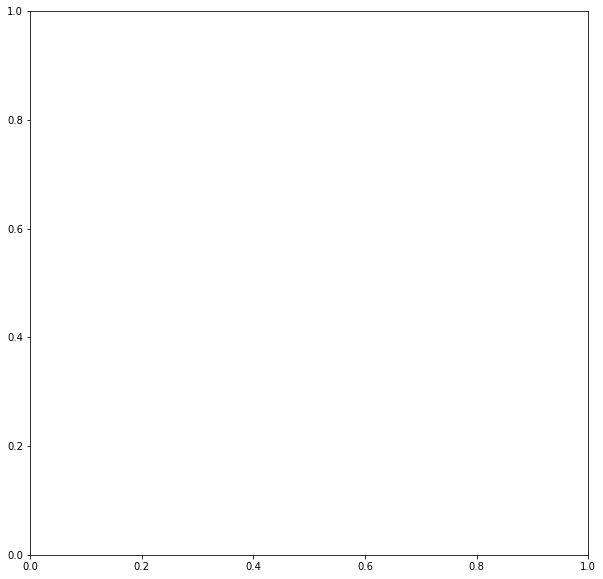

In [29]:
hca(PAIRS.cosine, linkage_method='complete', color_thresh=.9);